In [1]:
import json
from tqdm import tqdm
import eunomia
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LLM_model = 'gpt-3.5-turbo-16k' #'gpt-3.5-turbo-16k'
Embedding_model = 'text-davinci-003' #'text-davinci-003' text-embedding-ada-002
k = 12
temp = 0


predictions_list = []
for i in tqdm(range(1,112)):
    results_index_path = f"../Data/SI_PDF/faiss/results/{LLM_model}/faiss-{Embedding_model}/k_{k}/t_{temp}/two-step/results_paper_{i}.json"
    with open(results_index_path, 'rb') as f:
        paper_result = json.load(f)
    predictions_list.append(paper_result)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 2784.83it/s]


In [3]:
predictions_list[1]

{'MOF-5': {'Predicted Stability': 'Unstable', 'Paper id': '2'},
 'HKUST-1': {'Predicted Stability': 'Unstable', 'Paper id': '2'},
 'MIL-101': {'Predicted Stability': 'Unstable', 'Paper id': '2'},
 'ZIF-8': {'Predicted Stability': 'Stable', 'Paper id': '2'}}

In [4]:
def parse_ground_truth():
    import pandas as pd
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('../Result/Excel/Standard_Criteria_Binary.xlsx', engine='openpyxl')
    # Replace column names with corrected names
    df.columns = df.columns.str.replace('_x0002_', ' ')

    df = df[['MOF contained', 'True Water Stability', 'Reference #']]
    df = df.rename(columns={'MOF contained': 'MOF name', 'True Water Stability': 'Ground-truth Stability',
                            'Reference #': 'Paper id'})
    ground_truth_list = []
    for _, group in df.groupby("Paper id"):
        mofs = {
            row["MOF name"]: {
                "Ground-truth Stability": row["Ground-truth Stability"],
                "Paper id": str(row["Paper id"])
            }
            for _, row in group.iterrows()
        }
        ground_truth_list.append(mofs)
    return ground_truth_list

ground_truth_list = parse_ground_truth()

In [5]:
paper_id = 12
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(prediction_dict)
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=90)

{'Ni3(BTP)2': {'Predicted Stability': 'Stable', 'Paper id': '13'}, 'Cu3(BTP)2': {'Predicted Stability': 'Unstable', 'Paper id': '13'}, 'Zn3(BTP)2': {'Predicted Stability': 'Unstable', 'Paper id': '13'}, 'Co3(BTP)2': {'Predicted Stability': 'Not provided', 'Paper id': '13'}}
{'Ni3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}, 'Cu3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}, 'Zn3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}}


({'Ni3(BTP)2': {'Predicted Stability': 'Stable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'},
  'Cu3(BTP)2': {'Predicted Stability': 'Unstable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'},
  'Zn3(BTP)2': {'Predicted Stability': 'Unstable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'}},
 [('Ni3(BTP)2', 'Ni3(BTP)2'),
  ('Cu3(BTP)2', 'Cu3(BTP)2'),
  ('Zn3(BTP)2', 'Zn3(BTP)2')],
 [('Co3(BTP)2', 'Zn3(BTP)2')])

In [6]:
paper_id = 5
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=80)

{'MIL-100': {'Predicted Stability': 'Stable', 'Paper id': '6'}, 'MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '6'}}

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '6'}, 'MIL-100(Fe)': {'Ground-truth Stability': 'Stable', 'Paper id': '6'}}


({'MIL-100': {'Predicted Stability': 'Stable',
   'Paper id': '6',
   'Ground-truth Stability': 'Stable'},
  'MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '6',
   'Ground-truth Stability': 'Stable'}},
 [('MIL-100', 'MIL-100(Fe)'), ('MIL-101', 'MIL-101(Cr)')],
 [])

In [7]:
paper_id = 1
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=10)

{'MOF-5': {'Predicted Stability': 'Unstable', 'Paper id': '2'}, 'HKUST-1': {'Predicted Stability': 'Unstable', 'Paper id': '2'}, 'MIL-101': {'Predicted Stability': 'Unstable', 'Paper id': '2'}, 'ZIF-8': {'Predicted Stability': 'Stable', 'Paper id': '2'}}

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-69C': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}}


({'MOF-5': {'Predicted Stability': 'Unstable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'HKUST-1': {'Predicted Stability': 'Unstable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'MIL-101': {'Predicted Stability': 'Unstable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'},
  'ZIF-8': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'}},
 [('MOF-5', 'MOF-5'),
  ('HKUST-1', 'HKUST-1'),
  ('MIL-101', 'MIL-101(Cr)'),
  ('ZIF-8', 'ZIF-8')],
 [])

In [8]:
def eval_single_paper_results(combined_dict):
    # this is for binary
    y = []
    y_hat = []
    not_provided_count = 0
    for k, v in combined_dict.items():
        if v['Predicted Stability'] != 'Not provided':
            if v['Ground-truth Stability'] == 'Stable':
                y.append(1)
            else:
                y.append(0)
            if v['Predicted Stability'] == 'Stable':
                y_hat.append(1)
            else:
                y_hat.append(0)
        else:
            not_provided_count += 1
    return y, y_hat, not_provided_count


        
    
def eval_single_paper_results_ternary(combined_dict):
    y = []
    y_hat = []
    not_provided_count = 0
    for v in combined_dict.values():
        y.append(1 if v['Ground-truth Stability'] == 'Stable' else 0)
        if v['Predicted Stability'] == 'Not provided':
            y_hat.append(2)
            not_provided_count += 1
        else:
            y_hat.append(1 if v['Predicted Stability'] == 'Stable' else 0)
    return y, y_hat, not_provided_count

In [9]:
from fuzzywuzzy import fuzz
def match_MOF_names(prediction_dict, ground_truth_dict, threshold=80):
    """
    Match MOF names between prediction and ground truth dictionaries based on similarity.

    This function takes two dictionaries, prediction_dict and ground_truth_dict,
    where the keys represent MOF names and the values are dictionaries containing
    information related to the MOFs. It uses fuzzy matching to find matching pairs
    of MOF names between the two dictionaries based on similarity.

    Parameters:
        prediction_dict (dict): A dictionary containing predicted MOF data.
        ground_truth_dict (dict): A dictionary containing ground truth MOF data.
        threshold (int, optional): The minimum similarity score required to consider
            two keys as a match. The default threshold is 80.

    Returns:
        tuple: A tuple containing two elements:
            - A dictionary (combined_dict) that contains the combined information of
              the matched MOFs between prediction_dict and ground_truth_dict.
            - A list (matched_pairs) that contains tuples of matched key pairs from
              prediction_dict and ground_truth_dict.
            - A list (unmatched_pairs) that contains tuples of key that could not be matched between
              prediction_dict and ground_truth_dict.
    """

    combined_dict = {}
    matched_pairs = []
    unmatched_pairs = []
    matched_ground_truth_keys = set()  # Set to store matched ground_truth_dict keys

    for key_1, value_1 in prediction_dict.items():
        matched_key = None
        highest_similarity = 0

        for key_2 in ground_truth_dict.keys():
            # Check if the key_2 is already matched, if so, skip it
            if key_2 in matched_ground_truth_keys:
                continue

            similarity = fuzz.token_sort_ratio(key_1, key_2)
            if similarity > threshold and similarity > highest_similarity:
                matched_key = key_2
                highest_similarity = similarity

        if matched_key is not None:
            combined_dict[key_1] = {**value_1, **ground_truth_dict[matched_key]}
            matched_pairs.append((key_1, matched_key))
            # Add the matched ground_truth_dict key to the set
            matched_ground_truth_keys.add(matched_key)
        else:
            unmatched_pairs.append((key_1, key_2))

    return combined_dict, matched_pairs, unmatched_pairs

In [24]:
sim_threshold = 78
y_values = []
y_hat_values = []
not_provided_count_values = []
matched_pairs_list = []
unmatched_pairs_list = []
number_of_mofs_in_paper = []
number_of_mofs_matched_in_paper = []
for i in tqdm(range(0,111)): 
    prediction_dict = predictions_list[i]
    ground_truth_dict = ground_truth_list[i]
    combined_dict, matched_pairs, unmatched_pairs = eunomia.match_MOF_names(prediction_dict, ground_truth_dict,
                                                                   threshold=sim_threshold)
    y, y_hat, not_provided_count = eval_single_paper_results_ternary(combined_dict)
    y_values.append(y)
    y_hat_values.append(y_hat)
    not_provided_count_values.append(not_provided_count)
    matched_pairs_list.append(matched_pairs)
    unmatched_pairs_list.append(unmatched_pairs)
    unique_mofs_in_paper = len(ground_truth_dict.keys())
    number_of_mofs_in_paper.append(unique_mofs_in_paper)
    number_of_mofs_matched_in_paper.append(len(combined_dict.keys()))
#     break

y_values = [item for sublist in y_values for item in sublist]
y_hat_values = [item for sublist in y_hat_values for item in sublist]
not_provided_counts = np.sum(not_provided_count_values)
total_mofs = np.sum(number_of_mofs_in_paper)
total_mofs_matched = np.sum(number_of_mofs_matched_in_paper)
print(total_mofs, total_mofs_matched)
# y_values.append(2)
# y_hat_values.append(2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 2967.55it/s]

283 167


In [25]:
len(unmatched_pairs_list)

111

In [26]:
for i,m in enumerate(matched_pairs_list):
    print(f'Paper {i+1}: Matched pairs:{m}\n Not matched pairs:{unmatched_pairs_list[i]}\n\n')


Paper 1: Matched pairs:[('bio-MOF-11', 'Bio-MOF-11'), ('bio-MOF-12', 'Bio-MOF-12'), ('bio-MOF-13', 'Bio-MOF-13'), ('bio-MOF-14', 'Bio-MOF-14')]
 Not matched pairs:[]


Paper 2: Matched pairs:[('MOF-5', 'MOF-5'), ('HKUST-1', 'HKUST-1'), ('MIL-101', 'MIL-101(Cr)'), ('ZIF-8', 'ZIF-8')]
 Not matched pairs:[]


Paper 3: Matched pairs:[('MIL-101', 'MIL-101(Cr)'), ('MIL-101-NO2', 'MIL-101\n-NO2(Cr)'), ('MIL-101-NH2', 'MIL-101\n-NH2(Cr)'), ('MIL-101-SO3H', 'MIL-101\n-SO3H(Cr)')]
 Not matched pairs:[]


Paper 4: Matched pairs:[('HKUST-1', 'HKUST-1'), ('ZIF-8', 'ZIF-8'), ('MIL-101', 'MIL-101(Cr)'), ('MIL-100(Fe)', 'MIL-100(Fe)')]
 Not matched pairs:[('DUT-4', 'MIL-100(Fe)')]


Paper 5: Matched pairs:[('MIL-101', 'MIL-101(Cr)')]
 Not matched pairs:[]


Paper 6: Matched pairs:[('MIL-100', 'MIL-100(Fe)'), ('MIL-101', 'MIL-101(Cr)')]
 Not matched pairs:[]


Paper 7: Matched pairs:[('MIL-101', 'MIL-101(Cr)')]
 Not matched pairs:[]


Paper 8: Matched pairs:[('MIL-101', 'MIL-101(Cr)')]
 Not matched pai

Classification accuracy: 0.778, % MOF identified: 59.011


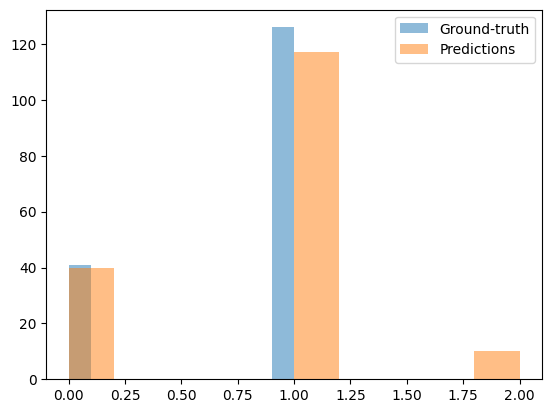

In [13]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y_values, y_hat_values)
mof_indetified = (total_mofs_matched/total_mofs) * 100

print(f"Classification accuracy: {acc:.03f}, % MOF identified: {mof_indetified:.03f}")

plt.hist(y_values, label='Ground-truth', alpha=0.5)
plt.hist(y_hat_values, label='Predictions', alpha=0.5)
plt.legend()

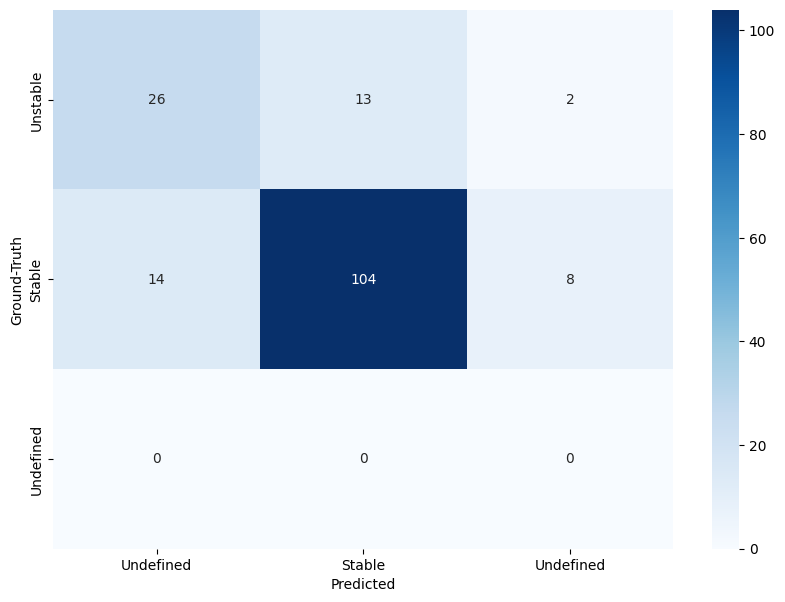

In [14]:

import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y_values, y_hat_values)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ax.set_xlabel('Predicted')
ax.set_ylabel('Ground-Truth')
# plt.ylim([0,1])
ax.set_yticklabels(['Unstable', 'Stable', 'Undefined'])
ax.set_xticklabels(['Undefined', 'Stable', 'Undefined'])

plt.show()

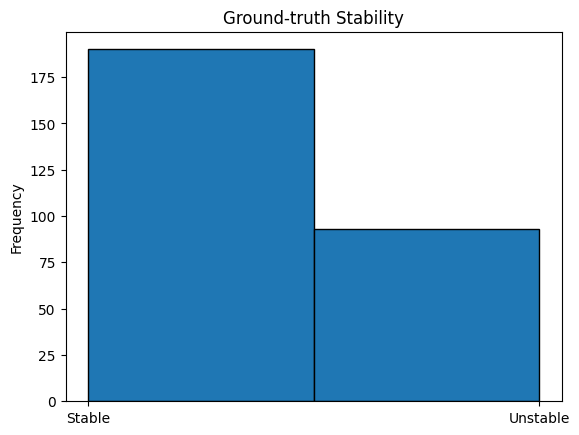

In [15]:
import matplotlib.pyplot as plt

# Extract Ground-truth Stability values
stability_values = [v['Ground-truth Stability'] for d in ground_truth_list for v in d.values()]

# Create histogram
plt.hist(stability_values, bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Ground-truth Stability')
plt.show()

In [16]:
def eval_performance(predictions_list, ground_truth_list, sim_threshold=80 ):
    y_values = []
    y_hat_values = []
    not_provided_count_values = []
    matched_pairs_list = []
    unmatched_pairs_list = []
    number_of_mofs_in_paper = []
    number_of_mofs_matched_in_paper = []
    for i in range(0,111): 
        prediction_dict = predictions_list[i]
        ground_truth_dict = ground_truth_list[i]
        combined_dict, matched_pairs, unmatched_pairs = eunomia.match_MOF_names(prediction_dict, ground_truth_dict,
                                                                       threshold=sim_threshold)
        y, y_hat, not_provided_count = eval_single_paper_results_ternary(combined_dict)
        y_values.append(y)
        y_hat_values.append(y_hat)
        not_provided_count_values.append(not_provided_count)
        matched_pairs_list.append(matched_pairs)
        unmatched_pairs_list.append(unmatched_pairs)
        unique_mofs_in_paper = len(ground_truth_dict.keys())
        number_of_mofs_in_paper.append(unique_mofs_in_paper)
        number_of_mofs_matched_in_paper.append(len(combined_dict.keys()))
    #     break

    y_values = [item for sublist in y_values for item in sublist]
    y_hat_values = [item for sublist in y_hat_values for item in sublist]
    not_provided_counts = np.sum(not_provided_count_values)
    total_mofs = np.sum(number_of_mofs_in_paper)
    total_mofs_matched = np.sum(number_of_mofs_matched_in_paper)
    acc = accuracy_score(y_values, y_hat_values)
    mof_indetified = (total_mofs_matched/total_mofs) * 100
    return acc, mof_indetified
    

In [17]:
acc_values = []
mof_indetified_values = []
sim_thresholds = range(5,95)
for t in sim_thresholds:
    acc, mof_indetified = eval_performance(predictions_list, ground_truth_list, sim_threshold=t)
    acc_values.append(acc)
    mof_indetified_values.append(mof_indetified)
    

Text(0.5, 0, 'Similarity Threshold')

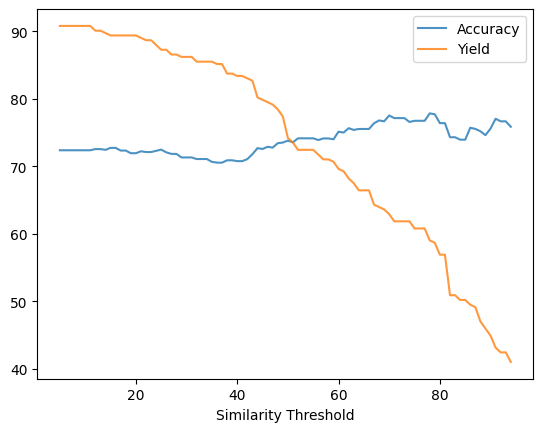

In [20]:
plt.figure(dpi=100)
alpha = 0.8
plt.plot(sim_thresholds, np.array(acc_values)*100, label='Accuracy', alpha=alpha)
plt.plot(sim_thresholds, mof_indetified_values, label='Yield', alpha=alpha)
plt.legend()
plt.xlabel('Similarity Threshold')

In [19]:
sim_thresholds[np.argmax(acc_values)]

78